In [31]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

In [101]:
x1 = [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1]
x2 = [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]
#x3 = [2.1, 0.3, 2.1, 2.8, 3.2, 2.9, 1.2, 1.6, 1.2, 0.8]

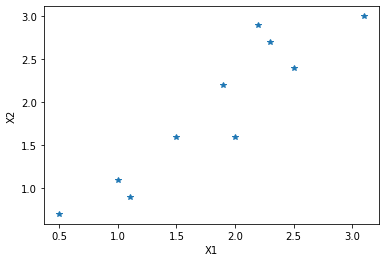

In [5]:
plt.figure("X1 vs X2")
plt.plot(x1, x2, '*')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [102]:
z1 = (x1-np.mean(x1))/np.std(x1)
z2 = (x2-np.mean(x2))/np.std(x2)
z3 = np.array([z1.T, z2.T])

In [99]:
z3

array([[ 0.92627881, -1.7585873 ,  0.52354889,  0.12081898,  1.73173864,
         0.6577922 ,  0.25506228, -1.08737078, -0.41615425, -0.95312747],
       [ 0.61016865, -1.506743  ,  1.23278973,  0.36112022,  1.35731394,
         0.9837413 , -0.38602507, -1.00864614, -0.38602507, -1.25769457]])

In [109]:
covariance = np.cov(np.array([z1, z2]))
covariance

array([[1.11111111, 1.0288103 ],
       [1.0288103 , 1.11111111]])

In [110]:
from numpy import linalg as LA
egn_values, egn_vectors = LA.eig(covariance)

In [111]:
egn_values, egn_vectors

(array([2.13992141, 0.08230081]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

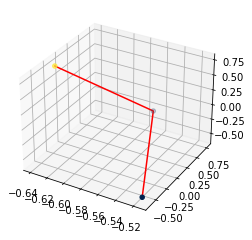

In [47]:
x = [-0.515279, -0.570763, -0.639309]
y = [-0.627174, 0.759518, -0.172585]
z = [-0.584072, -0.312029, 0.749332]
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(x, y, z, 'red')
ax.scatter3D(x, y, z, c=z, cmap='cividis');

In [112]:
np.dot(egn_vectors[0], egn_vectors[1])

0.0

In [86]:
r = np.cross(egn_vectors[0], egn_vectors[1])

In [88]:
np.dot(egn_vectors[0], egn_vectors[2])

-5.689893001203927e-16

In [113]:
new_vector = np.matmul(z3.T, egn_vectors[1:].T)
new_vector

array([[ 1.08643242],
       [-2.3089372 ],
       [ 1.24191895],
       [ 0.34078247],
       [ 2.18429003],
       [ 1.16073946],
       [-0.09260467],
       [-1.48210777],
       [-0.56722643],
       [-1.56328726]])

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
PCs = pca.fit_transform(z3.T)

In [108]:
PCs

array([[-1.08643242],
       [ 2.3089372 ],
       [-1.24191895],
       [-0.34078247],
       [-2.18429003],
       [-1.16073946],
       [ 0.09260467],
       [ 1.48210777],
       [ 0.56722643],
       [ 1.56328726]])